In [ ]:
from google.colab import files
import pandas as pd

# Upload a CSV file
uploaded = files.upload()

# Get the file name
file_name = next(iter(uploaded))

# Read the CSV file into a DataFrame
#df = pd.read_csv(file_name)
# Read the CSV file into a DataFrame
df = pd.read_csv('IndividualAOImetrics (2).csv')

# Display the DataFrame
df.head()

In [ ]:
df = pd.read_csv('IndividualAOImetrics (2).csv')

In [ ]:
import numpy as np

# Define conditions for the new 'Category' variable
conditions = [
    (df['Respondent Group'].isin(['PhD student', 'Default', 'Research Assistant'])),
    (df['Respondent Group'] == '2026')
]

# Define corresponding values for each condition
values = ['Experienced', 'Novice']

# Create the new 'Category' variable based on the conditions
df['Category'] = np.select(conditions, values, default=None)

In [ ]:
df = df[df['Label'].isin(['ChatGPT', 'Colab'])]

In [ ]:
# Assuming 'Category' is the column you want to check
unique_categories = df['Label'].unique()

# Print the unique categorical values
print("Unique categories in 'Category' column:", unique_categories)


Unique categories in 'Category' column: ['ChatGPT' 'Colab']


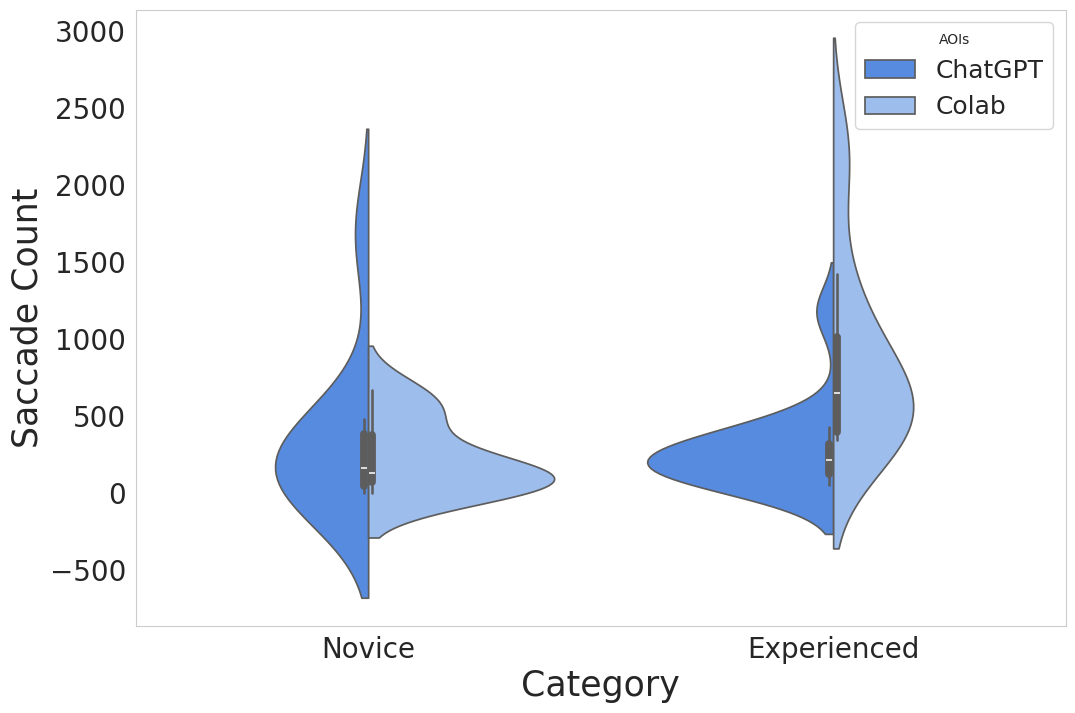

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with the provided data

# Set Seaborn style and remove background dashes for y-axis

sns.set_style("whitegrid", {'axes.grid' : False})
# Define custom palette with dark and light blue colors
custom_palette = {"ChatGPT": "#4086F7", "Colab": "#2C63F5"}


# Create a violin plot with subgroups based on 'Label' and introduce a gap
plt.figure(figsize=(12, 8))
sns.violinplot(x='Category', y='Saccade count', hue='Label', data=df, palette=custom_palette, split=True, order=('Novice', 'Experienced'), )

# Add mean and standard deviation annotations for each subgroup
for category in df['Category'].unique():
    for label in df[df['Category'] == category]['Label'].unique():
        subgroup_data = df[(df['Category'] == category) & (df['Label'] == label)]['Saccade count']
        mean_value = subgroup_data.mean()
        sd_value = subgroup_data.std()

# Set labels and title with larger font size
plt.xlabel('Category', fontsize=25)
plt.ylabel('Saccade Count', fontsize=25)

# Set x and y axis labels with larger font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Set x and y axis tick label font size
plt.tick_params(axis='both', labelsize=20)



# Show the legend
plt.legend(title='AOIs', loc='upper right', fontsize=18)

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Assuming 'df' is your original DataFrame
df2 = df.copy()  # Create a copy of the original DataFrame

# Rename the 'Fixation count' column to 'Fixcount'
df2.rename(columns={'Fixation count': 'Fixcount'}, inplace=True)

# Now 'df2' is a copy of 'df' with the desired changes


In [ ]:
df2.rename(columns={'Saccade count': 'Saccount'}, inplace=True)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'data' is your DataFrame
model = ols('Fixcount ~ C(Category) * C(Label)', data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                            sum_sq    df          F    PR(>F)
C(Category)           1.339082e+06   1.0  12.769783  0.000815
C(Label)              8.478782e+05   1.0   8.085555  0.006537
C(Category):C(Label)  6.280285e+05   1.0   5.989019  0.018105
Residual              5.033440e+06  48.0        NaN       NaN


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'data' is your DataFrame
model = ols('Saccount ~ C(Category) * C(Label)', data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                            sum_sq    df         F    PR(>F)
C(Category)           1.136476e+06   1.0  5.682084  0.021230
C(Label)              1.198564e+06   1.0  5.992512  0.018156
C(Category):C(Label)  1.484697e+06   1.0  7.423100  0.009014
Residual              9.400486e+06  47.0       NaN       NaN


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# This is for the Category
model = ols('Fixcount ~ C(Category) * C(Label)', data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                            sum_sq    df          F    PR(>F)
C(Category)           1.339082e+06   1.0  12.769783  0.000815
C(Label)              8.478782e+05   1.0   8.085555  0.006537
C(Category):C(Label)  6.280285e+05   1.0   5.989019  0.018105
Residual              5.033440e+06  48.0        NaN       NaN


In [ ]:
df2.rename(columns={'Dwell time (fixation, %)': 'Dwell'}, inplace=True)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'data' is your DataFrame
model = ols('Dwell ~ C(Category) * C(Label)', data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                            sum_sq    df          F    PR(>F)
C(Category)              39.126495   1.0   0.135398  0.714517
C(Label)               8521.703245   1.0  29.489617  0.000002
C(Category):C(Label)    844.264630   1.0   2.921604  0.093860
Residual              13870.704118  48.0        NaN       NaN
